# K Means Clustering Algorithm

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [12]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=23)

In [8]:
X.shape

(1000, 2)

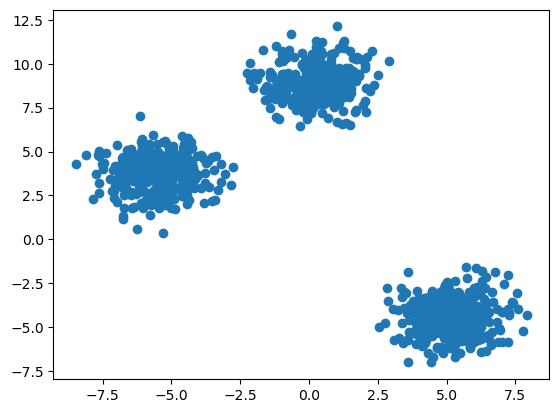

In [13]:
plt.scatter(X[:,0],X[:,1])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.cluster import KMeans

## using manual process --> Elbow Method
### to select the K value

In [37]:
# finding wcss
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[34827.57682552023,
 7935.437286145421,
 1319.2730531585605,
 1193.9227442698632,
 1073.7480615617292,
 855.6538308658787,
 763.3683666948023,
 675.3803717658959,
 648.43033733544,
 551.4060715897483]

Text(0, 0.5, 'WCSS')

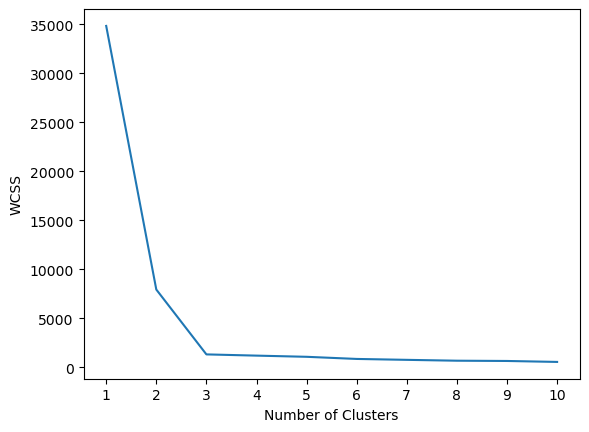

In [21]:
#plotting Elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [22]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [23]:
y_labels=kmeans.fit_predict(X_train)

In [32]:
y_test_label=kmeans.predict(X_test)

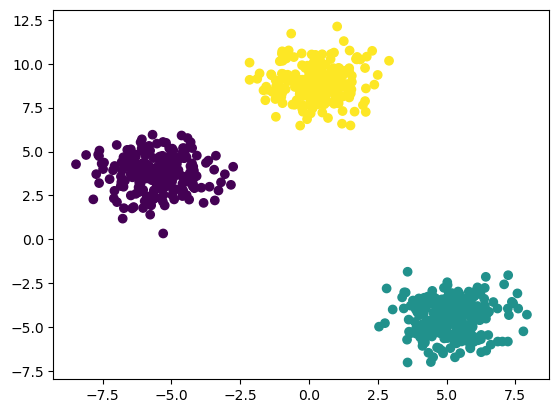

In [31]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

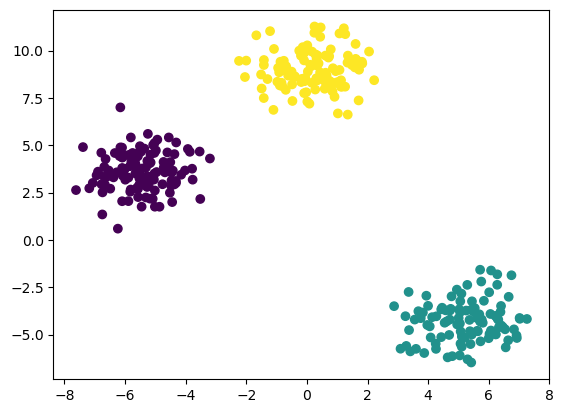

In [33]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

 ## Automatic method for finding the K value

In [34]:
## knee locator
!pip install kneed

In [35]:
from kneed import KneeLocator

In [38]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

## Performance metrics

### Silhoutte score

In [39]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [42]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797673,
 0.6357733426488265,
 0.6470623368397372,
 0.3338378048657467,
 0.3456934811504727,
 0.3189818234196631,
 0.32910885928502515,
 0.3312139340979486]

Text(0, 0.5, 'Silhouette Coffecient')

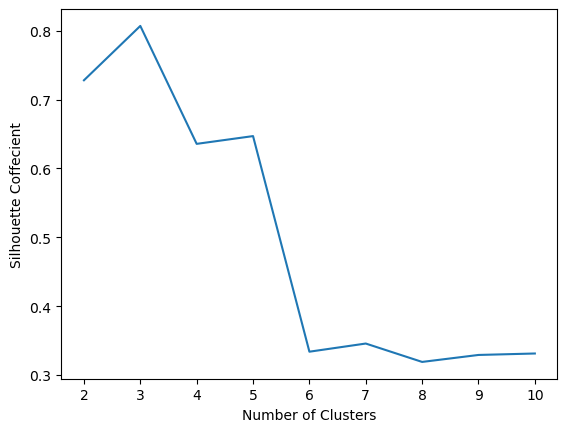

In [43]:
#plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coffecient')